# Mini Project: Data Cleansing with Spark

ใช้ PySpark, Spark SQL, Pandas จัดการข้อมูล เช่น Clean Data, EDA, Dat Profiling

# Step 1) ติดตั้ง Spark และ PySpark

In [1]:
!apt-get update                                                                          # อัพเดท Package ทั้งหมดใน VM ตัวนี้
!apt-get install openjdk-8-jdk-headless -qq > /dev/null                                  # ติดตั้ง Java Development Kit (จำเป็นสำหรับการติดตั้ง Spark)
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz # ติดตั้ง Spark 3.1.2
!tar xzvf spark-3.1.2-bin-hadoop2.7.tgz                                                  # Unzip ไฟล์ Spark 3.1.2
!pip install -q findspark==1.3.0

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [985 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelea

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK}_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [3]:
!pip install pyspark==3.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 212.4 MB 60 kB/s 
     |████████████████████████████████| 198 kB 13.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880769 sha256=1c61435965d0ddaaa3cda839a4aa7140ee0cfd094a314f25de7b2cfa055af855
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


## เริ่มใช้งาน Spark

In [4]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.214
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.42
clflush size	: 64
cache_alignment	: 64
address sizes

In [5]:
# ตั้งค่า lcoal[*] เพื่อ Spark ใช้งาน Multi_core ใน Spark ใช้ CPU ทุก Core
# Spark Session 
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[*]').getOrCreate()

In [6]:
# version python
import sys 
sys.version_info

sys.version_info(major=3, minor=7, micro=15, releaselevel='final', serial=0)

### Load data เข้าใน Spark
ใช้ spark.read.csv เพื่ออ่านข้อูลจากไฟล์ csv

heater=True บรรทัดแรกในไฟล์ csv คือ Header 

inferSchema=True ตัว Spark จะกำหนด Type แต่ละคอลัมน์เป็นชนิดอะไร

In [92]:
superstore = spark.read.csv('/content/superstore.csv',
                            header=True,
                            inferSchema=True)

# Step 2) Data Profiling

ตรวจสอบ Column

In [ ]:
superstore.show()

+------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|Row ID|      Order ID|Order Date| Ship Date|     Ship Mode|Customer ID|     Customer Name|    Segment|      Country|           City|         State|Postal Code| Region|     Product ID|       Category|Sub-Category|        Product Name|   Sales|Quantity|Discount|  Profit|
+------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|     1|CA-2016-152156|2016-11-08|11/11/2016|  Second Class|   CG-12520|       Claire Gute|   Consumer|United States|      Henderson|      Kentucky|      42420|  South|FUR-BO-10001798|   

In [ ]:
# ข้อมูล 10 แถวแรก
superstore.show(10)

+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|Row ID|      Order ID|Order Date| Ship Date|     Ship Mode|Customer ID|  Customer Name|  Segment|      Country|           City|     State|Postal Code|Region|     Product ID|       Category|Sub-Category|        Product Name|   Sales|Quantity|Discount|  Profit|
+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|     1|CA-2016-152156|2016-11-08|11/11/2016|  Second Class|   CG-12520|    Claire Gute| Consumer|United States|      Henderson|  Kentucky|      42420| South|FUR-BO-10001798|      Furniture|   Bookcases|Bush Somerset 

In [ ]:
# Type ของ column
superstore.dtypes

[('Row ID', 'int'),
 ('Order ID', 'string'),
 ('Order Date', 'string'),
 ('Ship Date', 'string'),
 ('Ship Mode', 'string'),
 ('Customer ID', 'string'),
 ('Customer Name', 'string'),
 ('Segment', 'string'),
 ('Country', 'string'),
 ('City', 'string'),
 ('State', 'string'),
 ('Postal Code', 'int'),
 ('Region', 'string'),
 ('Product ID', 'string'),
 ('Category', 'string'),
 ('Sub-Category', 'string'),
 ('Product Name', 'string'),
 ('Sales', 'string'),
 ('Quantity', 'string'),
 ('Discount', 'string'),
 ('Profit', 'double')]

In [ ]:
superstore.printSchema()

root
 |-- Row ID: integer (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal Code: integer (nullable = true)
 |-- Region: string (nullable = true)
 |-- Product ID: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sub-Category: string (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Sales: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- Discount: string (nullable = true)
 |-- Profit: double (nullable = true)



Type คอลัมน์ Order Date, Ship Date, Sales, Quantity, Discount, Profit ไม่ถูกต้อง จัดการเปลี่ยน Type ภายหลัง

In [ ]:
# นับ Row และ Column
print((superstore.count(), len(superstore.columns)))

(9994, 21)


In [ ]:
# ข้อมูลสติถิ
superstore.describe().show()

+-------+------------------+--------------+----------+---------+--------------+-----------+------------------+-----------+-------------+--------+-------+------------------+-------+---------------+----------+------------+--------------------+------------------+------------------+------------------+------------------+
|summary|            Row ID|      Order ID|Order Date|Ship Date|     Ship Mode|Customer ID|     Customer Name|    Segment|      Country|    City|  State|       Postal Code| Region|     Product ID|  Category|Sub-Category|        Product Name|             Sales|          Quantity|          Discount|            Profit|
+-------+------------------+--------------+----------+---------+--------------+-----------+------------------+-----------+-------------+--------+-------+------------------+-------+---------------+----------+------------+--------------------+------------------+------------------+------------------+------------------+
|  count|              9994|          9994|   

In [ ]:
# summary() ดูข้อมูลสติถิละเอียดมากขึ้น
superstore.summary().show()

+-------+------------------+--------------+----------+---------+--------------+-----------+------------------+-----------+-------------+--------+-------+------------------+-------+---------------+----------+------------+--------------------+------------------+------------------+------------------+------------------+
|summary|            Row ID|      Order ID|Order Date|Ship Date|     Ship Mode|Customer ID|     Customer Name|    Segment|      Country|    City|  State|       Postal Code| Region|     Product ID|  Category|Sub-Category|        Product Name|             Sales|          Quantity|          Discount|            Profit|
+-------+------------------+--------------+----------+---------+--------------+-----------+------------------+-----------+-------------+--------+-------+------------------+-------+---------------+----------+------------+--------------------+------------------+------------------+------------------+------------------+
|  count|              9994|          9994|   

In [ ]:
# เลือก column เฉพาะดูข้อมูลสติถิ
superstore.select('Sales', 'Profit', 'Quantity', 'Discount').describe().show()

+-------+------------------+------------------+------------------+------------------+
|summary|             Sales|            Profit|          Quantity|          Discount|
+-------+------------------+------------------+------------------+------------------+
|  count|              9994|              9994|              9994|              9994|
|   mean|234.41818199917006|28.587912967780834| 5.828590535392018|0.3155949113492862|
| stddev| 631.7890112674363| 234.3891156047269|25.520975563736403| 3.314008629792499|
|    min|          10/Pack"|         -6599.978|      1040 sheets"|           30/Box"|
|    max|            999.98|          8399.976|            98.352|            98.352|
+-------+------------------+------------------+------------------+------------------+



In [ ]:
superstore.printSchema()

root
 |-- Row ID: integer (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal Code: integer (nullable = true)
 |-- Region: string (nullable = true)
 |-- Product ID: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sub-Category: string (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Sales: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- Discount: string (nullable = true)
 |-- Profit: double (nullable = true)



In [ ]:
# เลือก columns เฉพราะที่ต้องการดู
superstore.select(['Order ID', 'Order Date', 'Sub-Category', 'Sales']).show()

+--------------+----------+------------+--------+
|      Order ID|Order Date|Sub-Category|   Sales|
+--------------+----------+------------+--------+
|CA-2016-152156|2016-11-08|   Bookcases|  261.96|
|CA-2016-152156|2016-11-08|      Chairs|  731.94|
|CA-2016-138688|2016-06-12|      Labels|   14.62|
|US-2015-108966|2015-10-11|      Tables|957.5775|
|US-2015-108966|2015-10-11|     Storage|  22.368|
|CA-2014-115812|2014-06-09| Furnishings|   48.86|
|CA-2014-115812|2014-06-09|         Art|    7.28|
|CA-2014-115812|2014-06-09|      Phones| 907.152|
|CA-2014-115812|2014-06-09|     Binders|  18.504|
|CA-2014-115812|2014-06-09|  Appliances|   114.9|
|CA-2014-115812|2014-06-09|      Tables|1706.184|
|CA-2014-115812|2014-06-09|      Phones| 911.424|
|CA-2017-114412|2017-04-15|       Paper|  15.552|
|CA-2016-161389|2016-12-05|     Binders| 407.976|
|US-2015-118983|2015-11-22|  Appliances|   68.81|
|US-2015-118983|2015-11-22|     Binders|   2.544|
|CA-2014-105893|2014-11-11|     Storage|  665.88|


คอลัมน์ไหนมี Missing Value บ้าง

In [ ]:
superstore.summary('count').show()

+-------+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+--------+--------+------+
|summary|Row ID|Order ID|Order Date|Ship Date|Ship Mode|Customer ID|Customer Name|Segment|Country|City|State|Postal Code|Region|Product ID|Category|Sub-Category|Product Name|Sales|Quantity|Discount|Profit|
+-------+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+--------+--------+------+
|  count|  9994|    9994|      9994|     9994|     9994|       9994|         9994|   9994|   9994|9994| 9994|       9994|  9994|      9994|    9994|        9994|        9994| 9994|    9994|    9994|  9994|
+-------+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+--

แสดงข้อมูลแถวที่มี Missing Value 

In [ ]:
superstore.where( superstore.Sales.isNull() ).show()

+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+--------+--------+------+
|Row ID|Order ID|Order Date|Ship Date|Ship Mode|Customer ID|Customer Name|Segment|Country|City|State|Postal Code|Region|Product ID|Category|Sub-Category|Product Name|Sales|Quantity|Discount|Profit|
+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+--------+--------+------+
+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+--------+--------+------+



# Step 3) EDA - Exploratory Data Analysis

## Non-Graphical EDA

เราสามารถใช้คำสั่ง Spark ในการค้นหาข้อมูลที่ต้องการได้

Filter

In [ ]:
# แสงดยอดขายมากกว่า 1000 และเรียง Sales มากที่สุดก่อน
superstore.filter('Sales >= 5000 ').sort('Sales', ascending=False).show()

+------+--------------+----------+----------+--------------+-----------+--------------------+-----------+-------------+-------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+---------+--------+--------+----------+
|Row ID|      Order ID|Order Date| Ship Date|     Ship Mode|Customer ID|       Customer Name|    Segment|      Country|         City|         State|Postal Code| Region|     Product ID|       Category|Sub-Category|        Product Name|    Sales|Quantity|Discount|    Profit|
+------+--------------+----------+----------+--------------+-----------+--------------------+-----------+-------------+-------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+---------+--------+--------+----------+
|  9040|CA-2016-117121|2016-12-17|12/21/2016|Standard Class|   AB-10105|       Adrian Barton|   Consumer|United States|      Detroit|      Michigan|      48205|Central|OFF-BI-100

In [ ]:
superstore.filter(superstore.Category == "Office Supplies" ).show()

+------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+---------------+--------+--------+--------+
|Row ID|      Order ID|Order Date| Ship Date|     Ship Mode|Customer ID|     Customer Name|    Segment|      Country|           City|         State|Postal Code| Region|     Product ID|       Category|Sub-Category|        Product Name|          Sales|Quantity|Discount|  Profit|
+------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+---------------+--------+--------+--------+
|     3|CA-2016-138688|2016-06-12| 6/16/2016|  Second Class|   DV-13045|   Darrin Van Huff|  Corporate|United States|    Los Angeles|    California|      90036|   Wes

In [ ]:
from pyspark.sql.functions import col

superstore.filter(col("City") == "Los Angeles").show()

+------+--------------+----------+----------+--------------+-----------+----------------+-----------+-------------+-----------+----------+-----------+------+---------------+---------------+------------+--------------------+--------+--------+--------+-------+
|Row ID|      Order ID|Order Date| Ship Date|     Ship Mode|Customer ID|   Customer Name|    Segment|      Country|       City|     State|Postal Code|Region|     Product ID|       Category|Sub-Category|        Product Name|   Sales|Quantity|Discount| Profit|
+------+--------------+----------+----------+--------------+-----------+----------------+-----------+-------------+-----------+----------+-----------+------+---------------+---------------+------------+--------------------+--------+--------+--------+-------+
|     3|CA-2016-138688|2016-06-12| 6/16/2016|  Second Class|   DV-13045| Darrin Van Huff|  Corporate|United States|Los Angeles|California|      90036|  West|OFF-LA-10000240|Office Supplies|      Labels|Self-Adhesive Add...|

where

In [ ]:
superstore.where(superstore.Profit > 10).select(['Customer ID','Category','Profit']).show()

+-----------+---------------+--------+
|Customer ID|       Category|  Profit|
+-----------+---------------+--------+
|   CG-12520|      Furniture| 41.9136|
|   CG-12520|      Furniture| 219.582|
|   BH-11710|      Furniture| 14.1694|
|   BH-11710|     Technology| 90.7152|
|   BH-11710|Office Supplies|   34.47|
|   BH-11710|      Furniture| 85.3092|
|   BH-11710|     Technology| 68.3568|
|   IM-15070|Office Supplies|132.5922|
|   PK-19075|Office Supplies| 13.3176|
|   ZD-21925|     Technology|  16.011|
|   KB-16585|Office Supplies| 15.6884|
|   EB-13870|      Furniture|240.2649|
|   EH-13945|     Technology| 11.7741|
|   TB-21520|      Furniture|  15.525|
|   GH-14485|     Technology|123.4737|
|   SN-20710|Office Supplies|  35.415|
|   SN-20710|     Technology| 41.7564|
|   LC-16930|     Technology| 16.5564|
|   ON-18715|     Technology| 19.7714|
|   DP-13000|Office Supplies| 17.9634|
+-----------+---------------+--------+
only showing top 20 rows



In [ ]:
superstore.where(superstore.City == 'San Francisco' ).show()

+------+--------------+----------+----------+--------------+-----------+------------------+---------+-------------+-------------+----------+-----------+------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+
|Row ID|      Order ID|Order Date| Ship Date|     Ship Mode|Customer ID|     Customer Name|  Segment|      Country|         City|     State|Postal Code|Region|     Product ID|       Category|Sub-Category|        Product Name|  Sales|Quantity|Discount|  Profit|
+------+--------------+----------+----------+--------------+-----------+------------------+---------+-------------+-------------+----------+-----------+------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+
|    19|CA-2014-143336|2014-08-27|  9/1/2014|  Second Class|   ZD-21925|Zuschuss Donatelli| Consumer|United States|San Francisco|California|      94109|  West|OFF-AR-10003056|Office Supplies|         Art|          New

In [ ]:
# นับ City มีกี่ City ที่ไม่ซ้ำกัน
superstore.select('City').distinct().count()

531

In [ ]:
# แสดงชื่อเมืองทั้งหมด 
superstore.select('City').distinct().sort('City').show(531, False)

+-----------------+
|City             |
+-----------------+
|Aberdeen         |
|Abilene          |
|Akron            |
|Albuquerque      |
|Alexandria       |
|Allen            |
|Allentown        |
|Altoona          |
|Amarillo         |
|Anaheim          |
|Andover          |
|Ann Arbor        |
|Antioch          |
|Apopka           |
|Apple Valley     |
|Appleton         |
|Arlington        |
|Arlington Heights|
|Arvada           |
|Asheville        |
|Athens           |
|Atlanta          |
|Atlantic City    |
|Auburn           |
|Aurora           |
|Austin           |
|Avondale         |
|Bakersfield      |
|Baltimore        |
|Bangor           |
|Bartlett         |
|Bayonne          |
|Baytown          |
|Beaumont         |
|Bedford          |
|Belleville       |
|Bellevue         |
|Bellingham       |
|Bethlehem        |
|Beverly          |
|Billings         |
|Bloomington      |
|Boca Raton       |
|Boise            |
|Bolingbrook      |
|Bossier City     |
|Bowling Green    |


##EDA แบบใช้กราฟฟิก

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_superstore = superstore.toPandas()

In [ ]:
df_superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164


In [ ]:
# แปลง Sales เป็น float
# แปลง Quantity, Discount เป็น int

df_superstore['Sales'] = pd.to_numeric(df_superstore['Sales'],errors='coerce')

In [ ]:
df_superstore['Quantity'] = pd.to_numeric(df_superstore['Quantity'], errors='coerce')
df_superstore['Discount'] = pd.to_numeric(df_superstore['Discount'], errors='coerce')

In [ ]:
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int32  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int32  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9694 non-null   float64
 18  Quantity

Boxplot

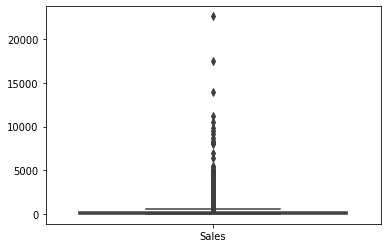

In [ ]:
sns.boxplot(data=df_superstore[['Sales']])

Histogram

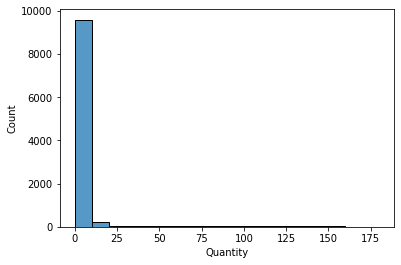

In [ ]:
sns.histplot(df_superstore['Quantity'], bins=[0, 10, 20, 40, 80, 120, 160, 180])

Scatterplot

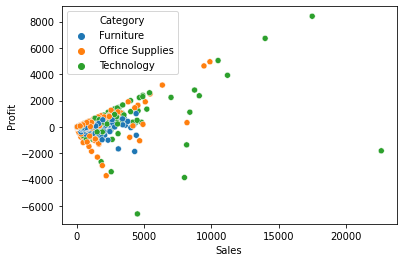

In [ ]:
sns.scatterplot(x='Sales', y='Profit',
                data=df_superstore,
                hue='Category')

# Step 4) Data Cleansing with Spark

มาทำความสะอาดข้อมูลด้วย Spark

### แปลง Data Type 

ตรวจสอบ Type ของคอลัมน์ถูกต้องไหม เปลี่ยน Data Type ให้ตรงกับ Type

Rename คอลัมน์

In [93]:
superstore_clean = superstore

In [94]:
superstoreSparkSQL = superstore

In [95]:
superstore = superstore.withColumnRenamed("Row ID","Row_ID")\
                        .withColumnRenamed("Order ID","Order_ID")\
                        .withColumnRenamed("Order Date","Order_Date")\
                        .withColumnRenamed("Ship Date","Ship_Date")\
                        .withColumnRenamed("Customer ID","Customer_ID")\
                        .withColumnRenamed("Postal Code","Postal_Code")\
                        .withColumnRenamed("Product ID","Product_ID")\
                        .withColumnRenamed("Sub-Category","Sub_Category")\
                        .withColumnRenamed("Product Name","Product_Name")\
                        .withColumnRenamed("Customer Name","Customer_Name")\
                        .withColumnRenamed("Ship Mode","Ship_Mode")

In [96]:
superstore_clean = superstore_clean.withColumnRenamed("Row ID","Row_ID")\
                        .withColumnRenamed("Order ID","Order_ID")\
                        .withColumnRenamed("Order Date","Order_Date")\
                        .withColumnRenamed("Ship Date","Ship_Date")\
                        .withColumnRenamed("Customer ID","Customer_ID")\
                        .withColumnRenamed("Postal Code","Postal_Code")\
                        .withColumnRenamed("Product ID","Product_ID")\
                        .withColumnRenamed("Sub-Category","Sub_Category")\
                        .withColumnRenamed("Product Name","Product_Name")\
                        .withColumnRenamed("Customer Name","Customer_Name")\
                        .withColumnRenamed("Ship Mode","Ship_Mode")

In [97]:
superstoreSparkSQL = superstoreSparkSQL.withColumnRenamed("Row ID","Row_ID")\
                        .withColumnRenamed("Order ID","Order_ID")\
                        .withColumnRenamed("Order Date","Order_Date")\
                        .withColumnRenamed("Ship Date","Ship_Date")\
                        .withColumnRenamed("Customer ID","Customer_ID")\
                        .withColumnRenamed("Postal Code","Postal_Code")\
                        .withColumnRenamed("Product ID","Product_ID")\
                        .withColumnRenamed("Sub-Category","Sub_Category")\
                        .withColumnRenamed("Product Name","Product_Name")\
                        .withColumnRenamed("Customer Name","Customer_Name")\
                        .withColumnRenamed("Ship Mode","Ship_Mode")

In [35]:
superstore_clean.dtypes

[('Row_ID', 'int'),
 ('Order_ID', 'string'),
 ('Order_Date', 'string'),
 ('Ship_Date', 'string'),
 ('Ship_Mode', 'string'),
 ('Customer_ID', 'string'),
 ('Customer_Name', 'string'),
 ('Segment', 'string'),
 ('Country', 'string'),
 ('City', 'string'),
 ('State', 'string'),
 ('Postal_Code', 'int'),
 ('Region', 'string'),
 ('Product_ID', 'string'),
 ('Category', 'string'),
 ('Sub_Category', 'string'),
 ('Product_Name', 'string'),
 ('Sales', 'double'),
 ('Quantity', 'int'),
 ('Discount', 'double'),
 ('Profit', 'double')]

แปลงคอลัมน์ตัวเลข

In [31]:
from pyspark.sql.types import IntegerType

# int
superstore_clean = superstore_clean.withColumn("Quantity", superstore_clean["Quantity"].cast(IntegerType()))

# double
superstore_clean = superstore_clean.withColumn("Sales", superstore_clean.Sales.cast('double'))\
                        .withColumn("Discount", superstore_clean.Discount.cast('double'))

In [14]:
superstore_clean.select(['Sales', 'Quantity', 'Profit', 'Discount']).show()

+--------+--------+--------+--------+
|   Sales|Quantity|  Profit|Discount|
+--------+--------+--------+--------+
|  261.96|       2| 41.9136|     0.0|
|  731.94|       3| 219.582|     0.0|
|   14.62|       2|  6.8714|     0.0|
|957.5775|       5|-383.031|    0.45|
|  22.368|       2|  2.5164|     0.2|
|   48.86|       7| 14.1694|     0.0|
|    7.28|       4|  1.9656|     0.0|
| 907.152|       6| 90.7152|     0.2|
|  18.504|       3|  5.7825|     0.2|
|   114.9|       5|   34.47|     0.0|
|1706.184|       9| 85.3092|     0.2|
| 911.424|       4| 68.3568|     0.2|
|  15.552|       3|  5.4432|     0.2|
| 407.976|       3|132.5922|     0.2|
|   68.81|       5|-123.858|     0.8|
|   2.544|       3|  -3.816|     0.8|
|  665.88|       6| 13.3176|     0.0|
|    55.5|       2|    9.99|     0.0|
|    8.56|       2|  2.4824|     0.0|
|  213.48|       3|  16.011|     0.2|
+--------+--------+--------+--------+
only showing top 20 rows



แปลงคอลัม Order_date จาก string เป็น date time MM/DD/YYYY

In [15]:
superstore_clean.select('Order_Date').show(5)

+----------+
|Order_Date|
+----------+
|2016-11-08|
|2016-11-08|
|2016-06-12|
|2015-10-11|
|2015-10-11|
+----------+
only showing top 5 rows



คอลัมน์ Order_Date แสดงเลขวันที่ MM-DD-yyyy
เปลี่ยนเฉพาะคอลัมน์ Order_Date จาก string เป็น date 

In [36]:
from pyspark.sql.types import *
superstore_clean = superstore_clean.withColumn("Order_Date", superstore_clean["Order_Date"].cast(DateType()))

In [37]:
superstore_clean.printSchema()

root
 |-- Row_ID: integer (nullable = true)
 |-- Order_ID: string (nullable = true)
 |-- Order_Date: date (nullable = true)
 |-- Ship_Date: string (nullable = true)
 |-- Ship_Mode: string (nullable = true)
 |-- Customer_ID: string (nullable = true)
 |-- Customer_Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal_Code: integer (nullable = true)
 |-- Region: string (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sub_Category: string (nullable = true)
 |-- Product_Name: string (nullable = true)
 |-- Sales: double (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Discount: double (nullable = true)
 |-- Profit: double (nullable = true)



In [38]:
superstore_clean.show(5)

+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|Row_ID|      Order_ID|Order_Date| Ship_Date|     Ship_Mode|Customer_ID|  Customer_Name|  Segment|      Country|           City|     State|Postal_Code|Region|     Product_ID|       Category|Sub_Category|        Product_Name|   Sales|Quantity|Discount|  Profit|
+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|     1|CA-2016-152156|2016-11-08|11/11/2016|  Second Class|   CG-12520|    Claire Gute| Consumer|United States|      Henderson|  Kentucky|      42420| South|FUR-BO-10001798|      Furniture|   Bookcases|Bush Somerset 

## Anomalies Check

ใช้ Spark ตามหาสิ่งที่ผิดปกติในข้อมูล

### ความผิดปกติ 1) Syntactical Anomalies
**Lexical errors** เช่น สะกดผิด

ตรวจสอบหมวดหมู่สินค้าที่สะกดผิด

In [39]:
superstore_clean.select('Sub_Category').distinct().count()

18

show ชื่อหมวดหมู่สินค้าทั้งหมดโดย sort เรียงตามตัวอักษร เพื่อดูหมวดหมู่สินค้าที่สะกดผิด

In [40]:
superstore_clean.select('Sub_Category').distinct().sort('Sub_Category').show(18, False)

+------------+
|Sub_Category|
+------------+
|Accessories |
|Appliances  |
|Art         |
|Artt        |
|Binders     |
|Bookcases   |
|Chairs      |
|Copiers     |
|Envelopes   |
|Fasteners   |
|Furnishings |
|Labels      |
|Machines    |
|Paper       |
|Phones      |
|Storage     |
|Supplies    |
|Tables      |
+------------+



เปลี่ยนชื่อหมวดหมู่สินค้า Artt ให้เป็น Art




In [41]:
from pyspark.sql.functions import when

superstore_clean = superstore_clean.withColumn('Sub_CategoryUpdate',
                                   when(superstore_clean['Sub_Category'] == 'Artt', 'Art') \
                                   .otherwise(superstore_clean['Sub_Category']))

In [42]:
superstore_clean.select('Sub_CategoryUpdate').distinct().count()

17

 เอาคอลัมน์ Sub_CategoryUpdate ไปแทนที่คอลัมน์ Sub_Category


In [43]:
superstore_clean = superstore_clean.drop('Sub_Category').withColumnRenamed('Sub_CategoryUpdate', 'Sub_Category')

In [23]:
superstore_clean.show(5)

+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+--------------------+--------+--------+--------+--------+------------+
|Row_ID|      Order_ID|Order_Date| Ship_Date|     Ship_Mode|Customer_ID|  Customer_Name|  Segment|      Country|           City|     State|Postal_Code|Region|     Product_ID|       Category|        Product_Name|   Sales|Quantity|Discount|  Profit|Sub_Category|
+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+--------------------+--------+--------+--------+--------+------------+
|     1|CA-2016-152156|2016-11-08|11/11/2016|  Second Class|   CG-12520|    Claire Gute| Consumer|United States|      Henderson|  Kentucky|      42420| South|FUR-BO-10001798|      Furniture|Bush Somerset Col...|  261.

In [44]:
# เช็คว่า Artt ยังมีในคอลัมน์ Sub_Category อีกไหม
superstore_clean.select('Sub_Category').distinct().sort('Sub_Category').show(18, False)

+------------+
|Sub_Category|
+------------+
|Accessories |
|Appliances  |
|Art         |
|Binders     |
|Bookcases   |
|Chairs      |
|Copiers     |
|Envelopes   |
|Fasteners   |
|Furnishings |
|Labels      |
|Machines    |
|Paper       |
|Phones      |
|Storage     |
|Supplies    |
|Tables      |
+------------+



นำข้อมูลที่ Clean ชื่อสะกดผิดของคอลัมน์ Sub_Category ไป Save ในตัวแปร superstore

In [45]:
superstore = superstore_clean

In [50]:
# ลองเช็คว่าใน superstore คอลัมน์ Sub_Category มีสะกดผิดอีกหรือไหม
superstore.select('Sub_Category').distinct().sort('Sub_Category').show(18, False)

+------------+
|Sub_Category|
+------------+
|Accessories |
|Appliances  |
|Art         |
|Binders     |
|Bookcases   |
|Chairs      |
|Copiers     |
|Envelopes   |
|Fasteners   |
|Furnishings |
|Labels      |
|Machines    |
|Paper       |
|Phones      |
|Storage     |
|Supplies    |
|Tables      |
+------------+



### ความผิดปกติ 2) Semantic Anomalies

**Integrity constraints**: ค่าอยู่นอกเหนือขอบเขตของค่าที่รับได้ เช่น
- Customer_ID: ค่าจะต้องเป็นตัวพิมพ์ใหญ่ 2 ตัวอักษณ - และตัวเลข 5 หลัก

In [51]:
superstore_clean.select('Customer_ID').show()

+-----------+
|Customer_ID|
+-----------+
|   CG-12520|
|   CG-12520|
|   DV-13045|
|   SO-20335|
|   SO-20335|
|   BH-11710|
|   BH-11710|
|   BH-11710|
|   BH-11710|
|   BH-11710|
|   BH-11710|
|   BH-11710|
|   AA-10480|
|   IM-15070|
|   HP-14815|
|   HP-14815|
|   PK-19075|
|   AG-10270|
|   ZD-21925|
|   ZD-21925|
+-----------+
only showing top 20 rows



In [52]:
superstore_clean.select('Customer_ID').count()

9994

In [53]:
superstore_clean.where(superstore_clean['Customer_ID'].rlike("^[A-Za-z]{2}-[0-9]{5}$")).count()

9992

Customer_ID ที่มีตัวเลข 5 ตำแหน่งทั้งหมด 9992 และที่เหลืออีก 2 แถวมี Customer_ID ที่อยู่นอกเหนือขอบเขตของค่าที่รับ

![](https://file.designil.com/MmVhZf+)

In [54]:
# ตัวแปรเข้าไปหาพื้นที่สีฟ้า ใช้ filter/where
correct_customerid = superstore_clean.filter(superstore_clean['Customer_ID'].rlike("^[A-Za-z]{2}-[0-9]{5}$"))

# พื้นที่สีแดงหาข้อมูลที่ผิด เอา data_book - พื้นที่สีแดง
incorrect_customerid = superstore_clean.subtract(correct_customerid)
incorrect_customerid.show()

+------+--------------+----------+---------+--------------+-----------+-------------+-----------+-------------+----------+--------+-----------+------+---------------+---------------+--------------------+------+--------+--------+-------+------------+
|Row_ID|      Order_ID|Order_Date|Ship_Date|     Ship_Mode|Customer_ID|Customer_Name|    Segment|      Country|      City|   State|Postal_Code|Region|     Product_ID|       Category|        Product_Name| Sales|Quantity|Discount| Profit|Sub_Category|
+------+--------------+----------+---------+--------------+-----------+-------------+-----------+-------------+----------+--------+-----------+------+---------------+---------------+--------------------+------+--------+--------+-------+------------+
|  6414|CA-2017-151211|2017-08-17|8/23/2017|Standard Class|  AH-101201|  Adrian Hane|Home Office|United States|Louisville|Kentucky|      40214| South|TEC-AC-10004510|     Technology|Logitech Desktop ...| 98.16|       6|     0.0|  9.816| Accessories|


Customer_ID >> AH-101201 ซึ่งเลข 1 เกินมาก

In [55]:
incorrect_customerid.count()

2

มาทำการแก้ไข Customer_ID นี้ให้ถูกต้องกัน 
AH-101201 เปลี่ยนเป็น AH-10120

In [56]:
superstore_clean = superstore_clean.withColumn('Customer_ID_Update',
                                         when(superstore_clean['Customer_ID'] == 'AH-101201', 'AH-10120' )\
                                         .otherwise(superstore_clean['Customer_ID']))

In [57]:
# เอาคอลัมน์ user_id_update ไปแทนที่ user_id
superstore_clean = superstore_clean.drop('Customer_ID').withColumnRenamed('Customer_ID_Update', 'Customer_ID')

In [58]:
superstore_clean.show(5)

+------+--------------+----------+----------+--------------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+--------------------+--------+--------+--------+--------+------------+-----------+
|Row_ID|      Order_ID|Order_Date| Ship_Date|     Ship_Mode|  Customer_Name|  Segment|      Country|           City|     State|Postal_Code|Region|     Product_ID|       Category|        Product_Name|   Sales|Quantity|Discount|  Profit|Sub_Category|Customer_ID|
+------+--------------+----------+----------+--------------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+--------------------+--------+--------+--------+--------+------------+-----------+
|     1|CA-2016-152156|2016-11-08|11/11/2016|  Second Class|    Claire Gute| Consumer|United States|      Henderson|  Kentucky|      42420| South|FUR-BO-10001798|      Furniture|Bush Somerset Col...|  261.96|       2|

In [59]:
# นับ Customer_ID ที่ถูกต้องทั้งหมดจะต้องเท่ากับ 9994
superstore_clean.where(superstore_clean['Customer_ID'].rlike("^[A-Za-z]{2}-[0-9]{5}$")).count()

9994

ลองเช็ค Customer_ID_Update มี ID ตัวเลขที่เกิน 5 ตัวอีกไหม

In [60]:
correct_customerid2 = superstore_clean.filter(superstore_clean['Customer_ID'].rlike("^[A-Za-z]{2}-[0-9]{5}$"))

incorrect_customerid2 = superstore_clean.subtract(correct_customerid2)
incorrect_customerid2.show()

+------+--------+----------+---------+---------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+-----+--------+--------+------+------------+-----------+
|Row_ID|Order_ID|Order_Date|Ship_Date|Ship_Mode|Customer_Name|Segment|Country|City|State|Postal_Code|Region|Product_ID|Category|Product_Name|Sales|Quantity|Discount|Profit|Sub_Category|Customer_ID|
+------+--------+----------+---------+---------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+-----+--------+--------+------+------------+-----------+
+------+--------+----------+---------+---------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+-----+--------+--------+------+------------+-----------+



In [61]:
superstore = superstore_clean

In [62]:
# ลองเช็ต superstore ในคอลัมน์ Customer_ID มี ID ที่ถูกต้องทั้งหมด 9994 หรือไหม 
superstore.where(superstore['Customer_ID'].rlike("^[A-Za-z]{2}-[0-9]{5}$")).count()

9994

### ความผิดปกติ 3) Missing values

การเช็คและแก้ไข Missing Values (หากจำเป็น)

ค่า Missing Value คือ ค่าที่ว่างเปล่า

เราจะรู้ได้ยังไงว่าคอลัมน์ไหนมีค่าว่างเปล่ากี่ค่า

In [63]:
from pyspark.sql.functions import col, sum

dt_nulllist = superstore_clean.select([ sum(col(colname).isNull().cast('int'))\
                                       .alias(colname) for colname in superstore_clean.columns ])

dt_nulllist.show()

+------+--------+----------+---------+---------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+-----+--------+--------+------+------------+-----------+
|Row_ID|Order_ID|Order_Date|Ship_Date|Ship_Mode|Customer_Name|Segment|Country|City|State|Postal_Code|Region|Product_ID|Category|Product_Name|Sales|Quantity|Discount|Profit|Sub_Category|Customer_ID|
+------+--------+----------+---------+---------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+-----+--------+--------+------+------------+-----------+
|     0|       0|         0|        0|        0|            0|      0|      0|   0|    0|          0|     0|         0|       0|           0|  300|      20|      11|     0|           0|          0|
+------+--------+----------+---------+---------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+-----+--------+--------+------+------------+-----------+



ข้อมูล Superstore ไม่มี Missing Value

In [64]:
# อีกวิธีหาค่า Missing Value 
superstore_clean.summary('count').show()

+-------+------+--------+---------+---------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+-----+--------+--------+------+------------+-----------+
|summary|Row_ID|Order_ID|Ship_Date|Ship_Mode|Customer_Name|Segment|Country|City|State|Postal_Code|Region|Product_ID|Category|Product_Name|Sales|Quantity|Discount|Profit|Sub_Category|Customer_ID|
+-------+------+--------+---------+---------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+-----+--------+--------+------+------------+-----------+
|  count|  9994|    9994|     9994|     9994|         9994|   9994|   9994|9994| 9994|       9994|  9994|      9994|    9994|        9994| 9694|    9974|    9983|  9994|        9994|       9994|
+-------+------+--------+---------+---------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+-----+--------+--------+------+------------+-----------+



### ความผิดปกติ 4) Outliers:

ข้อมูลที่สูงหรือต่ำผิดปกติจากข้อมูลส่วนใหญ่

มาลองใช้ Boxplot ในการหาค่า Outlier ของราคาหนังสือ

In [ ]:
df_superstore = superstore_clean.toPandas()

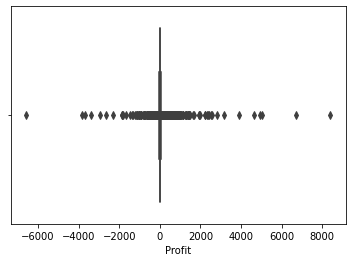

In [ ]:
sns.boxplot(x=df_superstore['Profit'])

เห็นได้ว่า Profit มีราค่าติดลบเยอะมาก ลองดูค่าสติถิคอลัมน์ Profit เหมือน Boxplot ไหม

In [ ]:
superstore_clean.select('Profit').summary().show()

+-------+------------------+
|summary|            Profit|
+-------+------------------+
|  count|              9994|
|   mean|28.587912967780834|
| stddev| 234.3891156047269|
|    min|         -6599.978|
|    25%|            1.2038|
|    50%|            8.1072|
|    75%|           28.7964|
|    max|          8399.976|
+-------+------------------+



เห็นได้ว่าข้อมูลตรงกันมาลองดูสินค้าชนิดไหนมี Profit ติดลบ

In [ ]:
superstore_clean.where( superstore_clean.Profit < -6599 ).distinct().show()

+------+--------------+----------+---------+--------------+-------------+--------+-------------+---------+-----+-----------+------+---------------+----------+--------------------+--------+--------+--------+---------+------------+-----------+
|Row_ID|      Order_ID|Order_Date|Ship_Date|     Ship_Mode|Customer_Name| Segment|      Country|     City|State|Postal_Code|Region|     Product_ID|  Category|        Product_Name|   Sales|Quantity|Discount|   Profit|Sub_Category|Customer_ID|
+------+--------------+----------+---------+--------------+-------------+--------+-------------+---------+-----+-----------+------+---------------+----------+--------------------+--------+--------+--------+---------+------------+-----------+
|  7773|CA-2016-108196|2016-11-25|12/2/2016|Standard Class|Cindy Stewart|Consumer|United States|Lancaster| Ohio|      43130|  East|TEC-MA-10000418|Technology|Cubify CubeX 3D P...|4499.985|       5|     0.7|-6599.978|    Machines|   CS-12505|
+------+--------------+---------

### มาลอง Clean ข้อมูลด้วย Spark SQL

![alt text](https://cdn-std.droplr.net/files/acc_513973/881iHw)

In [145]:
# แปลงข้อมูลจาก Spark DataFrame ให้เป็น TempView ก่อน
superstoreSparkSQL.createOrReplaceTempView('data')
superstore_sql = spark.sql('SELECT * FROM data')
superstore_sql.show()

+------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|Row_ID|      Order_ID|Order_Date| Ship_Date|     Ship_Mode|Customer_ID|     Customer_Name|    Segment|      Country|           City|         State|Postal_Code| Region|     Product_ID|       Category|Sub_Category|        Product_Name|   Sales|Quantity|Discount|  Profit|
+------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|     1|CA-2016-152156|2016-11-08|11/11/2016|  Second Class|   CG-12520|       Claire Gute|   Consumer|United States|      Henderson|      Kentucky|      42420|  South|FUR-BO-10001798|   

show ชื่อหมวดหมู่สินค้าทั้งหมดโดย sort เรียงตามตัวอักษร เพื่อดูหมวดหมู่สินค้าที่สะกดผิด ด้วย Spark SQL

In [146]:
check_Sub_Category= spark.sql(""" 
SELECT distinct Sub_Category
FROM data
ORDER BY Sub_Category """)

check_Sub_Category.count()

18

In [148]:
clearnSub_Category = spark.sql('''
select Sub_Category, count(Sub_Category) 
from data
group by Sub_Category
order by Sub_Category
''')

clearnSub_Category.show()

+------------+-------------------+
|Sub_Category|count(Sub_Category)|
+------------+-------------------+
| Accessories|                775|
|  Appliances|                466|
|         Art|                793|
|        Artt|                  3|
|     Binders|               1523|
|   Bookcases|                228|
|      Chairs|                617|
|     Copiers|                 68|
|   Envelopes|                254|
|   Fasteners|                217|
| Furnishings|                957|
|      Labels|                364|
|    Machines|                115|
|       Paper|               1370|
|      Phones|                889|
|     Storage|                846|
|    Supplies|                190|
|      Tables|                319|
+------------+-------------------+



Clear ด้วย Spark SQL




In [149]:
check_Sub_Category = spark.sql("""
    SELECT * 
    FROM data
    WHERE Sub_Category = 'Artt'
""").show()

+------+--------------+----------+----------+--------------+-----------+-------------+---------+-------------+-------------+-----------+-----------+-------+---------------+---------------+------------+--------------------+-----+--------+--------+------+
|Row_ID|      Order_ID|Order_Date| Ship_Date|     Ship_Mode|Customer_ID|Customer_Name|  Segment|      Country|         City|      State|Postal_Code| Region|     Product_ID|       Category|Sub_Category|        Product_Name|Sales|Quantity|Discount|Profit|
+------+--------------+----------+----------+--------------+-----------+-------------+---------+-------------+-------------+-----------+-----------+-------+---------------+---------------+------------+--------------------+-----+--------+--------+------+
|  6441|CA-2016-101161|2016-10-13|10/20/2016|Standard Class|   BW-11110| Bart Watters|Corporate|United States|New York City|   New York|      10024|   East|OFF-AR-10001860|Office Supplies|        Artt|BIC Liqua Brite L...| 34.7|       5| 

In [157]:
# ใช้ Spark SQL เปลี่ยน Artt เป็น Art
clean_Sub_Category = spark.sql("""
select Row_ID, Order_ID, Order_Date, Ship_Date, Ship_Mode,
    Customer_ID, Customer_Name, Segment, Country, City,
    State, Postal_Code, Region, Product_ID,
    Category, 
    case 
        when Sub_Category = 'Artt' then 'Art'
    else Sub_Category
    end as Sub_Category,
    Product_Name, Sales, Quantity, Discount, Discount
from data
""")

clean_Sub_Category.show()

+------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|Row_ID|      Order_ID|Order_Date| Ship_Date|     Ship_Mode|Customer_ID|     Customer_Name|    Segment|      Country|           City|         State|Postal_Code| Region|     Product_ID|       Category|Sub_Category|        Product_Name|   Sales|Quantity|Discount|Discount|
+------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|     1|CA-2016-152156|2016-11-08|11/11/2016|  Second Class|   CG-12520|       Claire Gute|   Consumer|United States|      Henderson|      Kentucky|      42420|  South|FUR-BO-10001798|   

In [151]:
# สังเกตุว่าก่อนยังไม่ clean ด้วย Spark SQL จะมีป Sub_Category อยู่ 18
# เมื่อ clean ข้อมูล Sub_Category มี 17 ซึ่งถูกต้อง
clean_Sub_Category.select('Sub_Category').distinct().count()

17

In [158]:
clean_Sub_Category.select('Sub_Category').distinct().sort('Sub_Category').show(17, False)

+------------+
|Sub_Category|
+------------+
|Accessories |
|Appliances  |
|Art         |
|Binders     |
|Bookcases   |
|Chairs      |
|Copiers     |
|Envelopes   |
|Fasteners   |
|Furnishings |
|Labels      |
|Machines    |
|Paper       |
|Phones      |
|Storage     |
|Supplies    |
|Tables      |
+------------+



แก้ไข Customer_ID นี้ให้ถูกต้องกัน AH-101201 เปลี่ยนเป็น AH-10120 ใช้ Spark SQL

In [180]:
check_customerid = spark.sql(""" 
    SELECT * 
    FROM data
    WHERE Customer_ID NOT RLIKE '^[A-Za-z]{2}-[0-9]{5}$'
""").show()

+------+--------------+----------+---------+--------------+-----------+-------------+-----------+-------------+----------+--------+-----------+------+---------------+---------------+------------+--------------------+------+--------+--------+-------+
|Row_ID|      Order_ID|Order_Date|Ship_Date|     Ship_Mode|Customer_ID|Customer_Name|    Segment|      Country|      City|   State|Postal_Code|Region|     Product_ID|       Category|Sub_Category|        Product_Name| Sales|Quantity|Discount| Profit|
+------+--------------+----------+---------+--------------+-----------+-------------+-----------+-------------+----------+--------+-----------+------+---------------+---------------+------------+--------------------+------+--------+--------+-------+
|  6413|CA-2017-151211|2017-08-17|8/23/2017|Standard Class|  AH-101201|  Adrian Hane|Home Office|United States|Louisville|Kentucky|      40214| South|OFF-BI-10002735|Office Supplies|     Binders|GBC Prestige Ther...|102.93|       3|       0|48.3771|


ทำการ Clean ข้อมูลทั้งคอลัมน์ Sub_Category และ Customer_ID พร้อมทีเดียว

In [190]:
df_Clean_superstore = spark.sql("""
select Row_ID, Order_ID, Order_Date, Ship_Date, Ship_Mode,
    case 
        when Customer_ID = 'AH-101201' then 'AH-10120'
    else Customer_ID
    end Customer_ID, 
    Customer_Name, Segment, Country, City,
    State, Postal_Code, Region, Product_ID,
    Category, 
    case 
        when Sub_Category = 'Artt' then 'Art'
    else Sub_Category
    end as Sub_Category,
    Product_Name, Sales, Quantity, 
    Discount
from data
""")

ลองตรวจสอบข้อมูล clearn_superstore ที่ผ่าน Clean ด้วย Spark SQL 



1.   Missing Value ใน user_id ค่า null
2.   เช็ค Customer_ID เกิน 6 หลัก
3.   เช็ค Sub_Category > Artt มีในข้อมูลอีกไหม



In [193]:
# Missing Value 
check_mv = df_Clean_superstore.select([ sum(col(colname).isNull().cast('int'))\
                                       .alias(colname) for colname in df_Clean_superstore.columns ])
check_mv.show()

+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+--------+--------+
|Row_ID|Order_ID|Order_Date|Ship_Date|Ship_Mode|Customer_ID|Customer_Name|Segment|Country|City|State|Postal_Code|Region|Product_ID|Category|Sub_Category|Product_Name|Sales|Quantity|Discount|
+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+--------+--------+
|     0|       0|         0|        0|        0|          0|            0|      0|      0|   0|    0|          0|     0|         0|       0|           0|           0|    0|       0|       0|
+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+--------+--------+



In [194]:
df_Clean_superstore.where(df_Clean_superstore.Customer_ID == 'AH-101201').show()

+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+--------+--------+
|Row_ID|Order_ID|Order_Date|Ship_Date|Ship_Mode|Customer_ID|Customer_Name|Segment|Country|City|State|Postal_Code|Region|Product_ID|Category|Sub_Category|Product_Name|Sales|Quantity|Discount|
+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+--------+--------+
+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+--------+--------+



In [195]:
df_Clean_superstore.where(df_Clean_superstore.Sub_Category == 'Artt').show()

+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+--------+--------+
|Row_ID|Order_ID|Order_Date|Ship_Date|Ship_Mode|Customer_ID|Customer_Name|Segment|Country|City|State|Postal_Code|Region|Product_ID|Category|Sub_Category|Product_Name|Sales|Quantity|Discount|
+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+--------+--------+
+------+--------+----------+---------+---------+-----------+-------------+-------+-------+----+-----+-----------+------+----------+--------+------------+------------+-----+--------+--------+



# Step 5) Save data เป็น CSV

โดยปกติแล้ว Spark จะทำการ Save ออกมาเป็นหลายไฟล์ เพราะใช้หลายเครื่องในการประมวลผล

In [196]:
superstore_clean.coalesce(1).write.csv('spark_sperstore.csv',  header=True)

df_Clean_superstore.coalesce(1).write.csv('spark_sql_superstore.csv', header=True)     